In [1]:
!pip install tensorflow

In [2]:
pip install black

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
   labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
import os

dataset_path = os.path.abspath(r"C:\Users\HP\Plant\valid")
print(dataset_path)  # This will show the absolute path


C:\Users\HP\Plant\valid


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
   labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
## Building Convolution Layer

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

In [22]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3031s 1s/step - accuracy: 0.4032 - loss: 2.1189 - val_accuracy: 0.8516 - val_loss: 0.4645
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3007s 1s/step - accuracy: 0.8368 - loss: 0.5176 - val_accuracy: 0.9203 - val_loss: 0.2493
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3014s 1s/step - accuracy: 0.9060 - loss: 0.2910 - val_accuracy: 0.9378 - val_loss: 0.1920
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3173s 1s/step - accuracy: 0.9337 - loss: 0.1993 - val_accuracy: 0.9418 - val_loss: 0.1861
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3654s 2s/step - accuracy: 0.9510 - loss: 0.1474 - val_accuracy: 0.9567 - val_loss: 0.1367
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3407s 2s/step - accuracy: 0.9625 - loss: 0.1144 - val_accuracy: 0.9652 - val_loss: 0.1118
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2943s 1s/step - accuracy: 0.9711 - loss: 0.0896 - val_accuracy: 0.9672 - val_loss: 0.1088
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2954s 1s/step - accuracy: 0.9722 -

In [25]:
#Model Evaluation on Training set
train_loss,train_acc = model. evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 842s 383ms/step - accuracy: 0.9916 - loss: 0.0299


In [26]:
print(train_loss,train_acc)

0.024884290993213654 0.9930862784385681


In [27]:
# Model on Validation set
val_loss,val_acc = model. evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 224s 407ms/step - accuracy: 0.9722 - loss: 0.0939


In [28]:
print(val_loss,val_acc)

0.09045975655317307 0.9737650752067566


In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history


{'accuracy': [0.6067714691162109,
  0.8609431385993958,
  0.9146169424057007,
  0.9409773349761963,
  0.9553310871124268,
  0.9657443761825562,
  0.9730563759803772,
  0.9753183126449585,
  0.9798847436904907,
  0.981492280960083],
 'loss': [1.3343305587768555,
  0.43788447976112366,
  0.262867271900177,
  0.17995740473270416,
  0.13464660942554474,
  0.10548172891139984,
  0.08402834087610245,
  0.07561945915222168,
  0.06168312951922417,
  0.055646881461143494],
 'val_accuracy': [0.8516389727592468,
  0.9203277826309204,
  0.937798798084259,
  0.9418392777442932,
  0.9567493796348572,
  0.965228796005249,
  0.9671636819839478,
  0.9640336632728577,
  0.9505463242530823,
  0.9737650752067566],
 'val_loss': [0.4644763171672821,
  0.2492639124393463,
  0.19204938411712646,
  0.18614192306995392,
  0.13667051494121552,
  0.11181452125310898,
  0.10875888168811798,
  0.1197974905371666,
  0.16775882244110107,
  0.09045973420143127]}

In [31]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

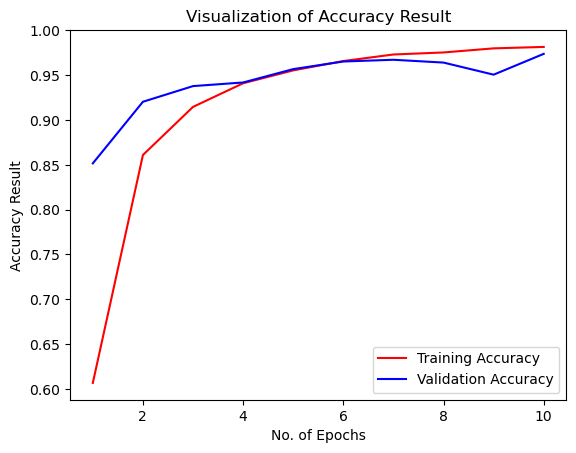

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [34]:
class_name = validation_set.class_names
print(class_name)  # Or any other operation you want to perform


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
   labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 164s 297ms/step


(array([[1.0000000e+00, 1.1922047e-11, 4.8624254e-11, ..., 4.9298323e-18,
         2.0975618e-16, 4.6410042e-16],
        [1.0000000e+00, 6.6504558e-12, 5.9642796e-10, ..., 6.6635618e-19,
         1.7206543e-17, 1.3733137e-15],
        [1.0000000e+00, 1.1299635e-14, 4.3966366e-13, ..., 2.5279158e-22,
         9.4248015e-20, 8.1415381e-19],
        ...,
        [5.1726829e-08, 8.3523838e-10, 3.2746786e-07, ..., 8.0148137e-09,
         4.8889124e-09, 9.9998391e-01],
        [9.1975110e-08, 9.1474134e-10, 1.1330688e-07, ..., 2.7270575e-08,
         2.9061826e-09, 9.9999237e-01],
        [3.3200635e-14, 7.0151112e-15, 1.2620596e-13, ..., 1.0743346e-14,
         7.1378694e-14, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.94      0.96      0.95       502
                               Blueberry___healthy       0.99      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.95      0.94       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.97      0.

In [44]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[495,   0,   0, ...,   0,   0,   0],
       [  1, 488,   1, ...,   0,   0,   0],
       [  1,   0, 429, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 483,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   1, ...,   0,   0, 473]], dtype=int64)

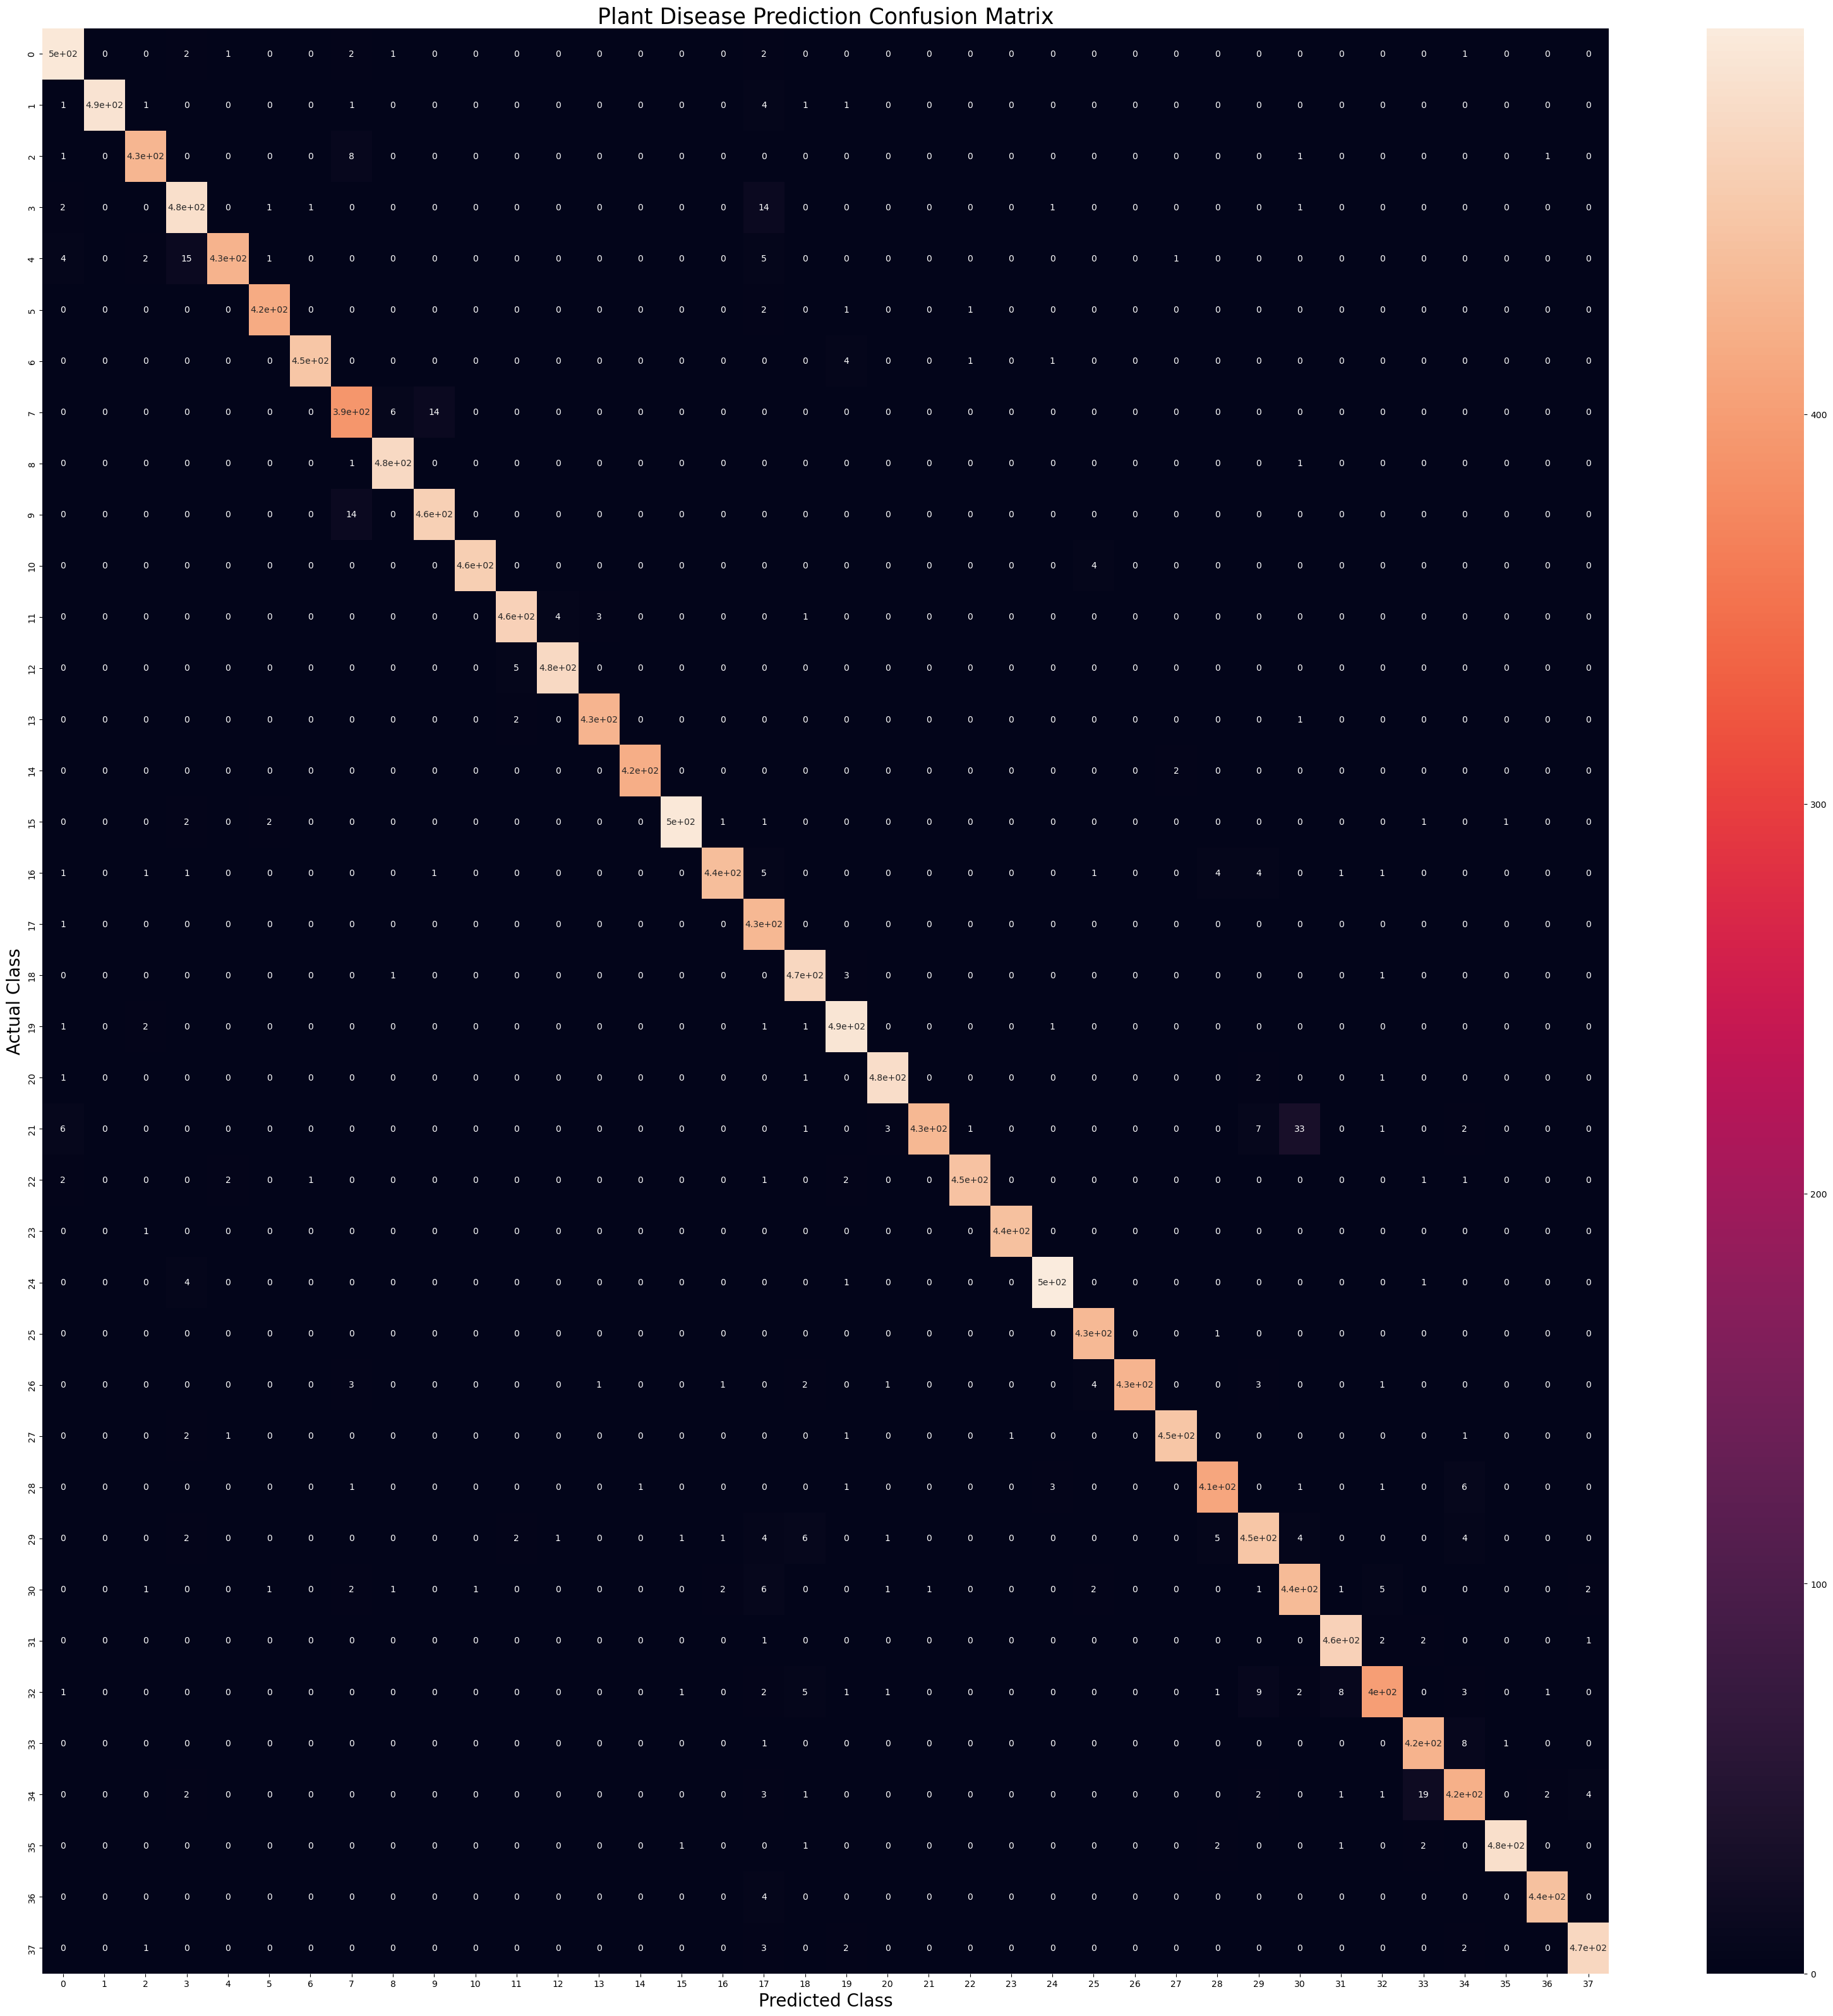

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [47]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.6/39.5 MB 10.5 MB/s eta 0:00:04
   - -------------------------------------- 1.8/39.5 MB 9.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/39.5 MB 6.2 MB/s eta 0:00:06
   ---- ----------------------------------- 4.5/39.5 MB 6.1 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/39.5 MB 5.4 MB/s eta 0:00:07
   ------ --------------------------------- 6.6/39.5 MB 5.5 MB/s eta 0:00:06
   ------- -------------------------------- 7.9/39.5 MB 5.6 MB/s eta 0:00:06
   --------- ------------------------------ 9.2/39.5 MB 5.6 MB/s eta 0:00:06
   ---------- ----------------------------- 10.5/39.5 MB 5.7 MB/s eta 0:00:06
   ----------- ---------------------------- 11.5/39.5 MB 5.7 MB/s eta 0:00:05
   ------------- -------------------------- 12.8/39.5 MB 5.7 MB/s eta 0:00:05
   -------------- ------------------------- 14.2/39.5 MB 5.7 MB/s eta 0:00:05
 

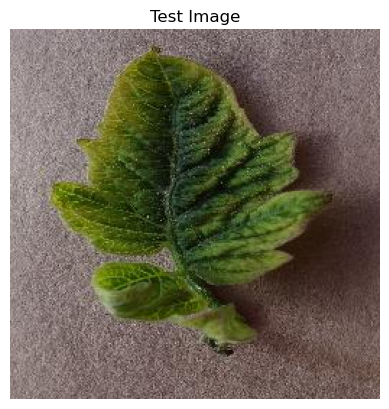

In [52]:
import cv2
import matplotlib.pyplot as plt

image_path = r"D:\plant\test\test\TomatoYellowCurlVirus1.JPG"

# Read the image
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found. Check the file path.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.title("Test Image")
    plt.axis("off")  # Hide axes
    plt.show()


In [54]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [56]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


(array([[3.2144249e-09, 5.3925803e-10, 3.2046557e-07, 6.7352479e-09,
         2.2523408e-09, 7.1462142e-07, 7.3845707e-11, 5.7033236e-09,
         4.4383948e-11, 4.2577470e-09, 1.0352268e-09, 1.1812564e-07,
         1.3189088e-08, 1.9159408e-07, 6.3535122e-11, 5.3815761e-06,
         2.6042086e-09, 5.6014743e-10, 1.6715247e-05, 3.5167464e-09,
         5.8202665e-11, 9.1687325e-06, 3.0429693e-08, 1.9232488e-07,
         7.1125239e-09, 2.2467138e-07, 2.7632626e-07, 5.0798548e-09,
         6.9981652e-06, 5.6117092e-06, 3.2899226e-07, 7.5903716e-07,
         4.8149155e-07, 2.7997402e-04, 5.3575572e-05, 9.9961770e-01,
         1.2376104e-06, 4.0375436e-08]], dtype=float32),
 (1, 38))

In [58]:
result_index = np.argmax(prediction)
result_index

35

In [60]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
            'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

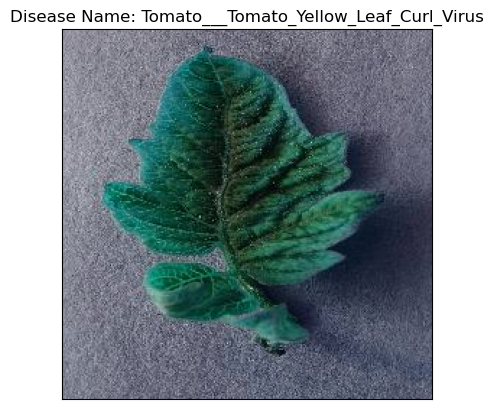

In [62]:
#Displaying Result of disease prediction 
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([]) 
plt.show()

In [64]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'